<a href="https://colab.research.google.com/github/shrishti-04/eCommerceEDA/blob/master/eCommerceEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Ensure the TransactionDate is in datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [4]:
# Customer distribution by region
region_distribution = customers['Region'].value_counts()

<ipython-input-5-2d7e5556cdd3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")


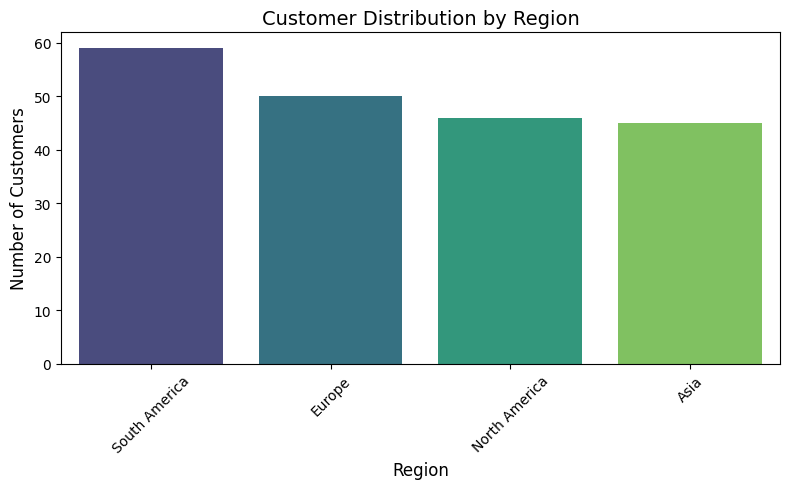

In [5]:
# Plot customer distribution by region
plt.figure(figsize=(8, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")
plt.title("Customer Distribution by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Product popularity by category
category_distribution = products['Category'].value_counts()

<ipython-input-7-60c9d2afd678>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="muted")


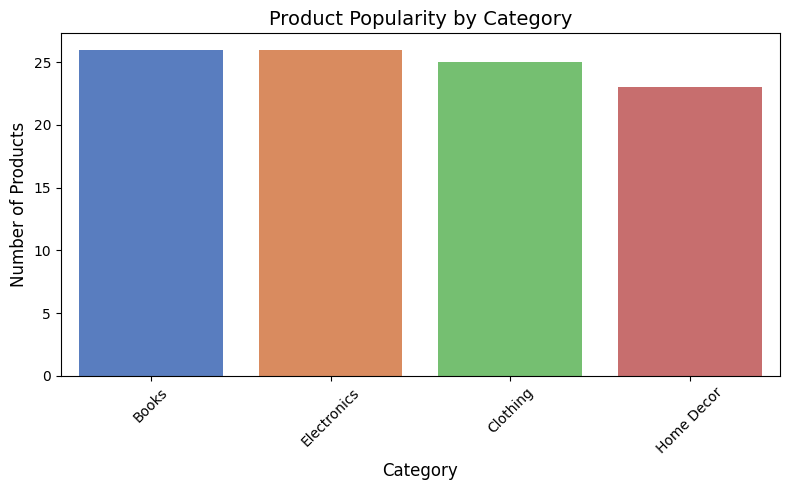

In [7]:
# Plot product category distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="muted")
plt.title("Product Popularity by Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Transaction trends over time
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions.groupby('YearMonth')['TotalValue'].sum()

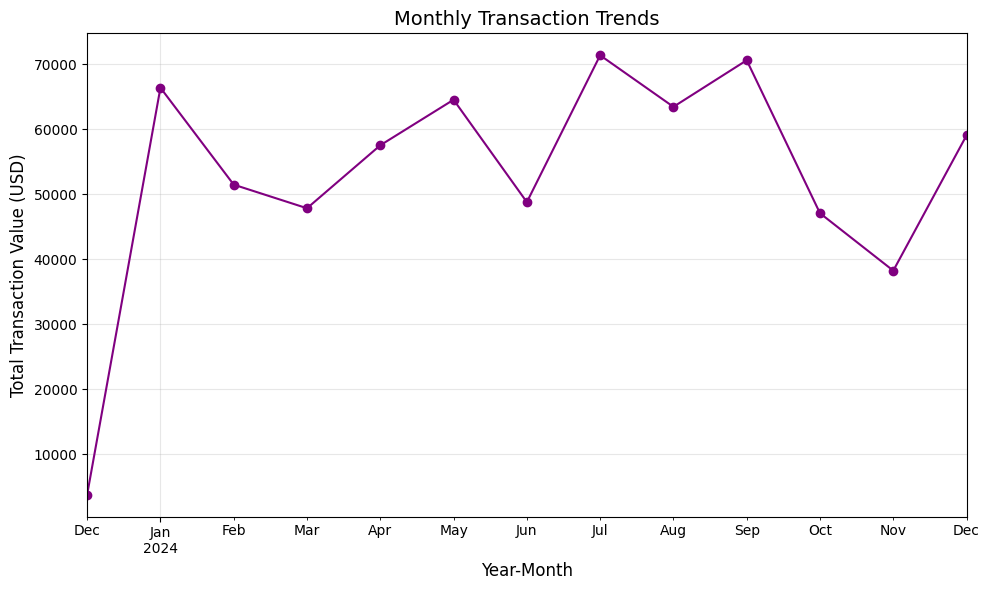

In [9]:
# Plot transaction trends
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Transaction Trends", fontsize=14)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Total Transaction Value (USD)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [10]:
# Revenue by region
transactions_with_customers = transactions.merge(customers, on="CustomerID")
revenue_by_region = transactions_with_customers.groupby('Region')['TotalValue'].sum()

<ipython-input-11-20722b126d51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="coolwarm")


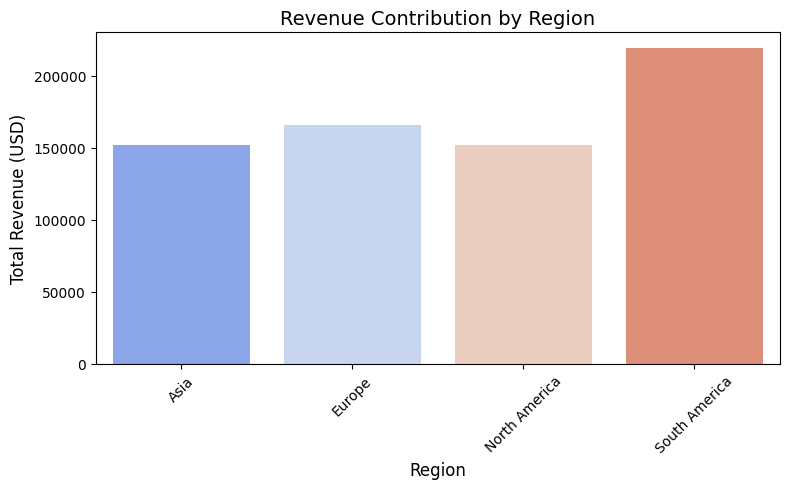

In [11]:
# Plot revenue by region
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="coolwarm")
plt.title("Revenue Contribution by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Merge dataframes to get customer transaction profiles
transaction_data = pd.merge(transactions, products, on='ProductID', how='left')
customer_data = pd.merge(transaction_data, customers, on='CustomerID', how='left')

In [13]:
# Feature Engineering: Extract relevant features
# For simplicity, let's take the total quantity of each product category purchased by each customer
customer_profile = customer_data.groupby(['CustomerID', 'Category'])['Quantity'].sum().unstack(fill_value=0)

In [14]:
# Normalize the features
scaler = StandardScaler()
customer_profile_scaled = scaler.fit_transform(customer_profile)

In [15]:
# Calculate cosine similarity between customers
similarity_matrix = cosine_similarity(customer_profile_scaled)

In [16]:
# Get top 3 similar customers for each of the first 20 customers
lookalike_dict = {}

for i in range(20):
    # Get similarity scores for the current customer (ignoring the customer itself)
    similarity_scores = similarity_matrix[i]
    sorted_similarities = np.argsort(similarity_scores)[::-1][1:4]  # Get top 3 similar customers, excluding the customer itself
    similar_customers = [(customer_profile.index[j], similarity_scores[j]) for j in sorted_similarities]
    lookalike_dict[customer_profile.index[i]] = similar_customers

In [17]:
# Convert the results into a DataFrame and save it
lookalike_df = pd.DataFrame.from_dict(lookalike_dict, orient='index', columns=['Lookalike1', 'Lookalike2', 'Lookalike3'])
lookalike_df.to_csv('Lookalike.csv', index_label='CustomerID')

In [18]:
# Output the lookalike recommendations for the first 20 customers
print(lookalike_df.head())

                        Lookalike1                   Lookalike2  \
C0001  (C0157, 0.9602751057942883)  (C0069, 0.9364788887212508)   
C0002  (C0133, 0.9856367901344193)  (C0159, 0.9690275317324203)   
C0003  (C0170, 0.9853275475858256)  (C0100, 0.9624073705147977)   
C0004  (C0065, 0.9371890881473209)  (C0075, 0.9039797184440359)   
C0005  (C0007, 0.9767326874492891)  (C0085, 0.9603857604734453)   

                        Lookalike3  
C0001  (C0026, 0.9277254827838058)  
C0002  (C0178, 0.9659318591577342)  
C0003  (C0195, 0.9203262124883981)  
C0004  (C0012, 0.8966475307781164)  
C0005   (C0197, 0.930078299576563)  


In [19]:
# Merge datasets to get customer transaction profiles
customer_data = pd.merge(transactions, customers, on='CustomerID', how='left')

In [20]:
# Feature Engineering - Aggregate transaction data by customer
customer_profile = customer_data.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    average_spend=('TotalValue', 'mean')
).reset_index()

In [21]:
# Include customer profile data (Region and SignupDate)
# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customer_profile = pd.merge(customer_profile, customers[['CustomerID', 'Region', 'SignupDate']], on='CustomerID', how='left')

In [22]:
# Create new features:
# - Customer tenure (how long they have been a customer)
customer_profile['tenure_months'] = (pd.to_datetime('today') - customer_profile['SignupDate']).dt.days / 30

In [23]:
# One-Hot Encoding for categorical features (Region)
customer_profile = pd.get_dummies(customer_profile, columns=['Region'], drop_first=True)

In [24]:
# Normalize the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profile[['total_spend', 'transaction_count', 'average_spend', 'tenure_months']])

In [25]:
# Apply KMeans clustering
n_clusters = 4  # You can experiment with this number (between 2 and 10)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_profile['cluster'] = kmeans.fit_predict(scaled_data)

In [26]:
# Calculate Davies-Bouldin Index (DB Index)
db_index = davies_bouldin_score(scaled_data, customer_profile['cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.1612210862676202


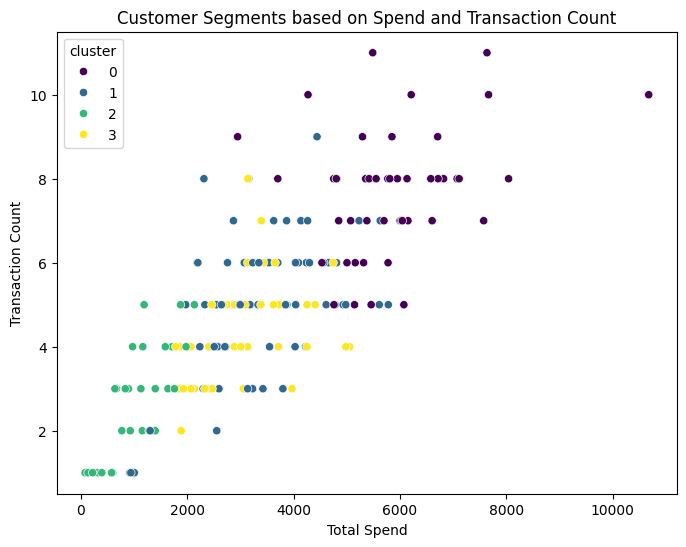

In [27]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_profile['total_spend'], y=customer_profile['transaction_count'], hue=customer_profile['cluster'], palette='viridis')
plt.title('Customer Segments based on Spend and Transaction Count')
plt.xlabel('Total Spend')
plt.ylabel('Transaction Count')
plt.show()

In [28]:
# Save the customer segments (clusters) to a CSV file
customer_profile.to_csv('Customer_Segments.csv', index=False)